DATA VISUALIZATION


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from scipy import stats

In [15]:
df=pd.read_csv("train.csv")

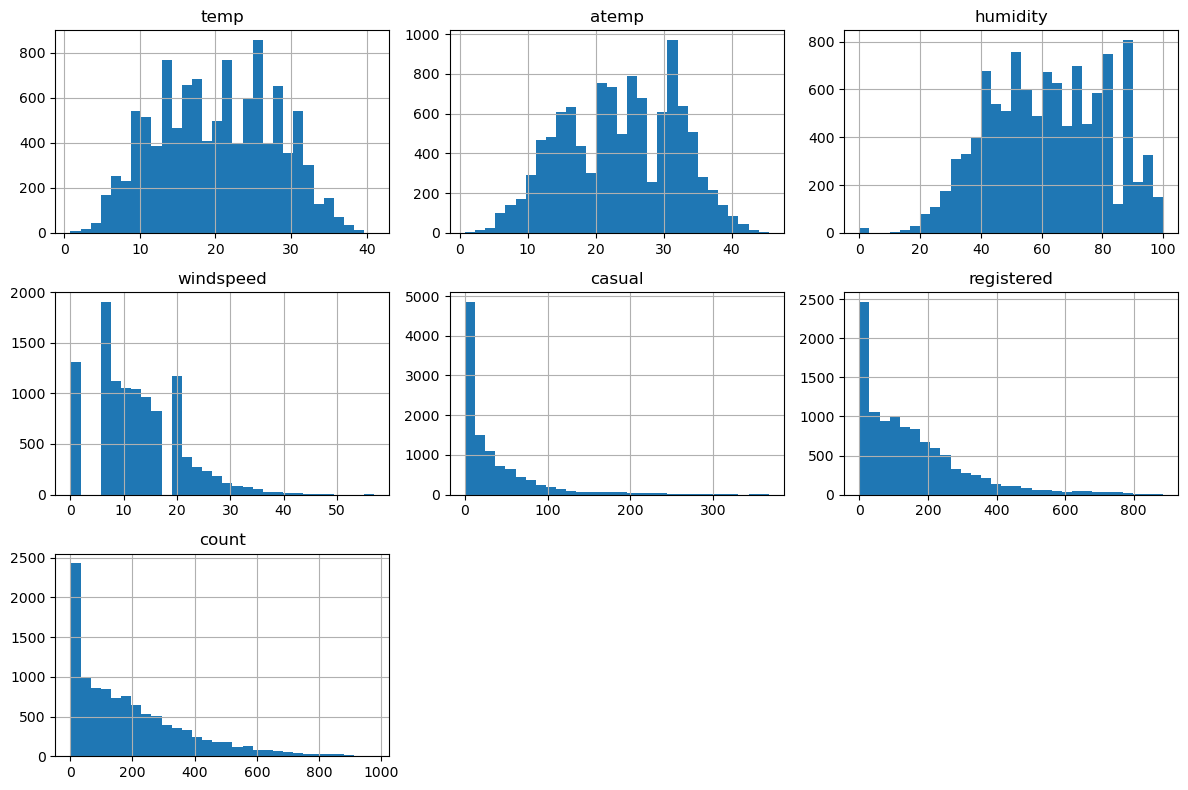

In [16]:

#Q2.1 histograms 
num_cols = ['temp','atemp','humidity','windspeed','casual','registered','count']
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'temp'),
  Text(1, 0, 'atemp'),
  Text(2, 0, 'humidity'),
  Text(3, 0, 'windspeed'),
  Text(4, 0, 'casual'),
  Text(5, 0, 'registered'),
  Text(6, 0, 'count')])

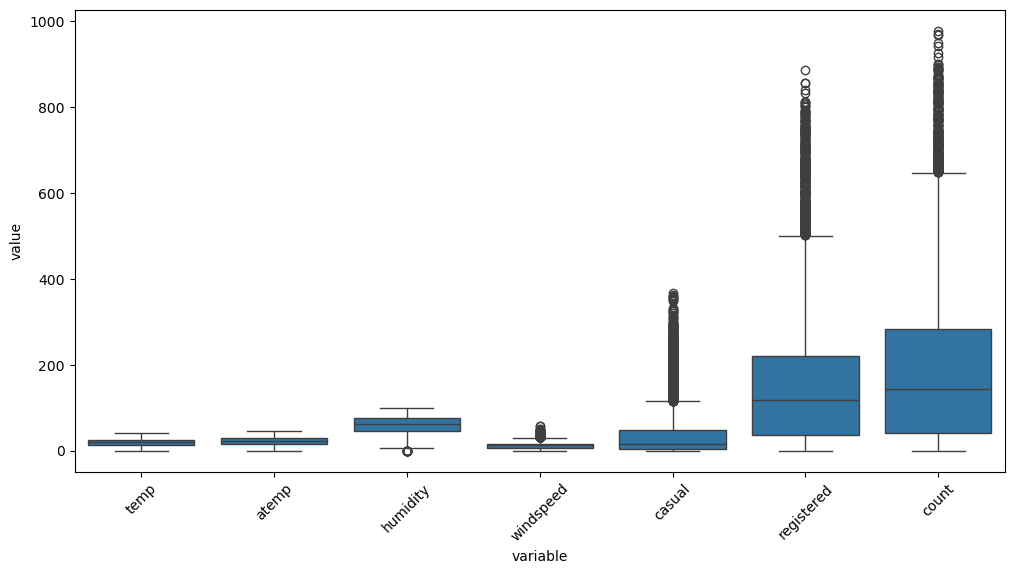

In [17]:
#Q2.2 box plots 
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols].melt(var_name='variable', value_name='value'), x='variable', y='value')
plt.xticks(rotation=45)


<Axes: xlabel='workingday', ylabel='count'>

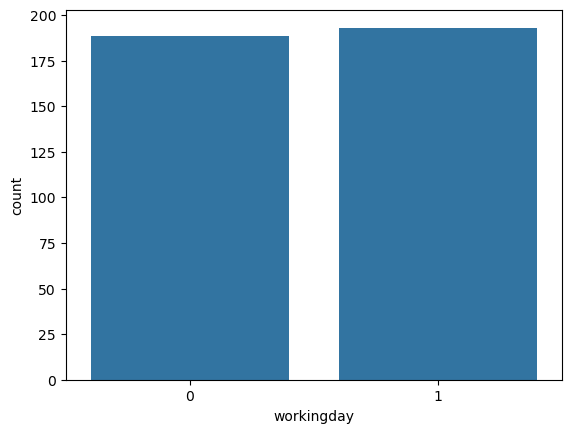

In [11]:
#Q2.3 mean count : working vs non-working
agg = df.groupby('workingday')['count'].mean().reset_index()
sns.barplot(x='workingday', y='count', data=agg)


In [23]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour


In [28]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['year'] = df['datetime'].dt.year

totals = df.groupby('year')[['casual', 'registered', 'count']].sum().reset_index()
print(totals)


   year  casual  registered    count
0  2011  155817      626162   781979
1  2012  236318     1067179  1303497


<Axes: xlabel='month', ylabel='count'>

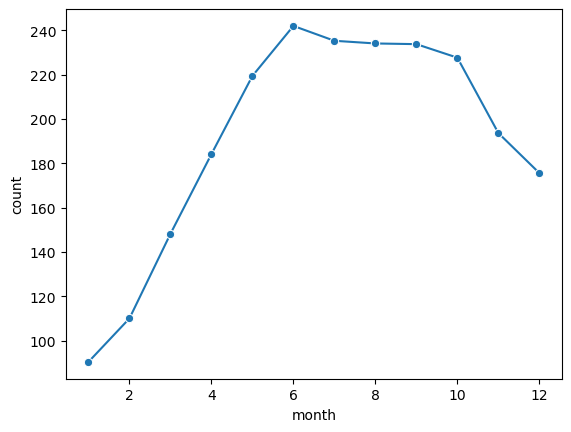

In [24]:
#Q2.4 mean count by month
month_mean = df.groupby('month')['count'].mean().reset_index()
sns.lineplot(x='month', y='count', data=month_mean, marker='o')


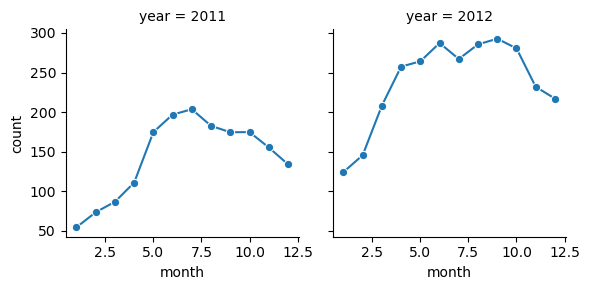

In [29]:
#Q2.5. mean by month for each year
g = sns.FacetGrid(df, col='year')
g.map_dataframe(lambda data, color: sns.lineplot(x='month', y='count', data=data.groupby('month')['count'].mean().reset_index(), marker='o'))

In [34]:
weather_map={
  1:'Clear/Partly Cloudy',
  2:'Mist/Cloudy',
  3:'Light Rain/Snow',
  4:'Heavy Precip/Fog'
}
df['weather_name']=df['weather'].map(weather_map)
weather_mean=df.groupby('weather_name')['count'].mean().sort_values()
print(weather_mean)

weather_name
Light Rain/Snow        118.846333
Heavy Precip/Fog       164.000000
Mist/Cloudy            178.955540
Clear/Partly Cloudy    205.236791
Name: count, dtype: float64


/var/folders/yg/_17071v52gj5ww0gzm_hb2bw0000gn/T/ipykernel_12501/2461226681.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='weather_name', y='count', data=df, ci=95)


([0, 1, 2, 3],
 [Text(0, 0, 'Clear/Partly Cloudy'),
  Text(1, 0, 'Mist/Cloudy'),
  Text(2, 0, 'Light Rain/Snow'),
  Text(3, 0, 'Heavy Precip/Fog')])

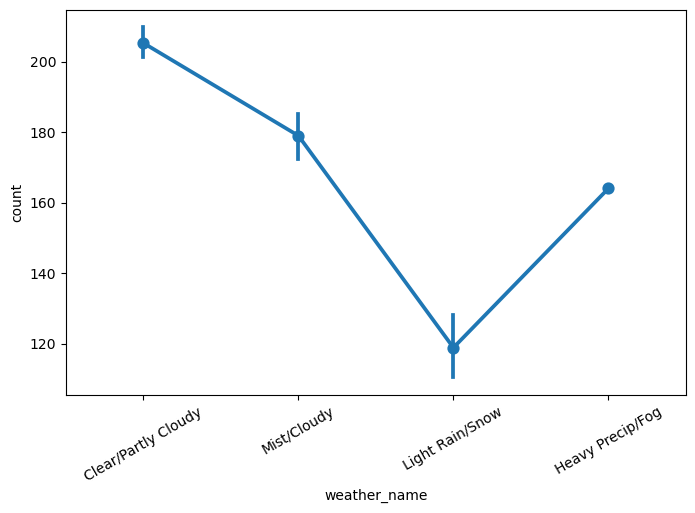

In [35]:
#Q2.6. mean +95% CI by weather
plt.figure(figsize=(8,5))
sns.pointplot(x='weather_name', y='count', data=df, ci=95)
plt.xticks(rotation=30)


<Axes: xlabel='hour', ylabel='count'>

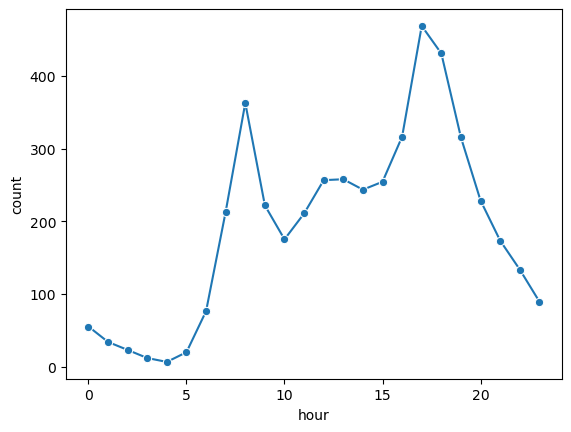

In [36]:
#Q2.7 mean count vs hour 
hour_mean = df.groupby('hour')['count'].mean().reset_index()
sns.lineplot(x='hour', y='count', data=hour_mean, marker='o')

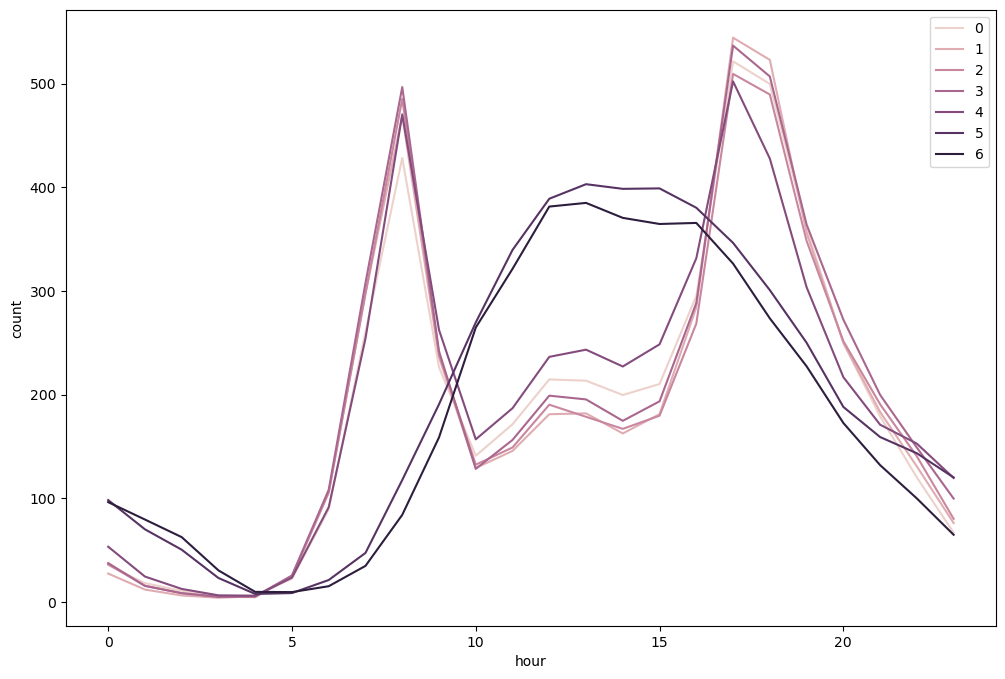

In [37]:
#Q2.8 repeat per weekday 
plt.figure(figsize=(12,8))
sns.lineplot(x='hour', y='count', hue='weekday', data=df.groupby(['weekday','hour'])['count'].mean().reset_index())
plt.legend(bbox_to_anchor=(1,1))

In [39]:
season_map={1:'spring' ,2:'summer', 3:'fall', 4:'winter'}
df['season_name']=df['season'].map(season_map)

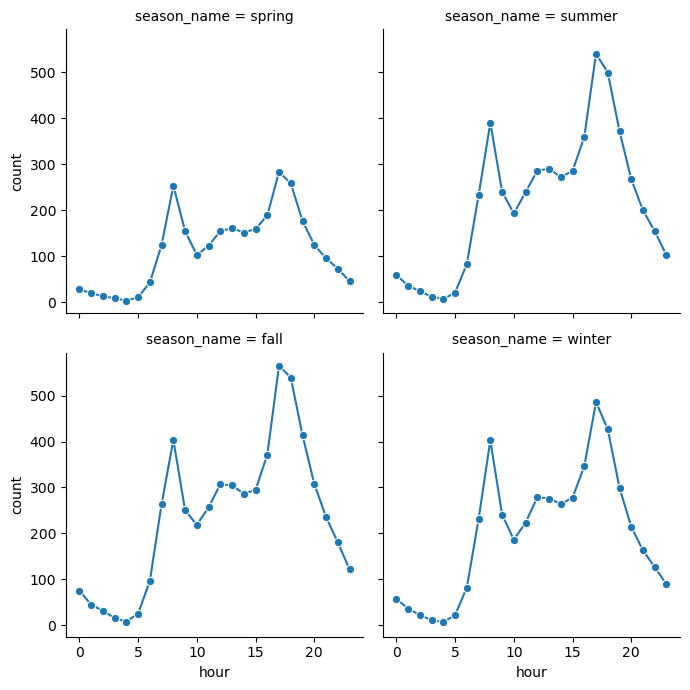

In [40]:
#Q2.9 repeating 8th plot for seasons with facetgrid
g = sns.FacetGrid(df, col='season_name', col_wrap=2, height=3.5)
g.map_dataframe(lambda data, color: sns.lineplot(x='hour', y='count', data=data.groupby('hour')['count'].mean().reset_index(), marker='o'))

In [42]:
bins = [0,6,12,18,24]
labels = ['night','morning','afternoon', 'evening']
df['day_period']= pd.cut(df['hour'], bins=bins, labels=labels,right=False)
print(df[['hour','day_period']])

       hour day_period
0         0      night
1         1      night
2         2      night
3         3      night
4         4      night
...     ...        ...
10881    19    evening
10882    20    evening
10883    21    evening
10884    22    evening
10885    23    evening

[10886 rows x 2 columns]


/var/folders/yg/_17071v52gj5ww0gzm_hb2bw0000gn/T/ipykernel_12501/3898335771.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='day_period', y='count', hue='workingday', data=df, ci=95)


<Axes: xlabel='day_period', ylabel='count'>

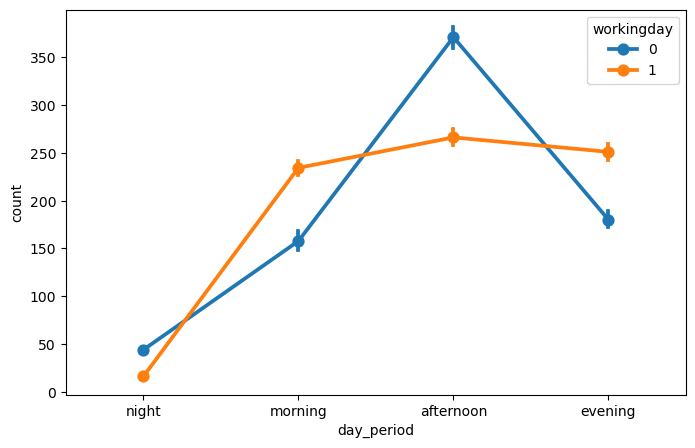

In [43]:
#Q2.10 mea & 95% CI by day_period and working day 
plt.figure(figsize=(8,5))
sns.pointplot(x='day_period', y='count', hue='workingday', data=df, ci=95)

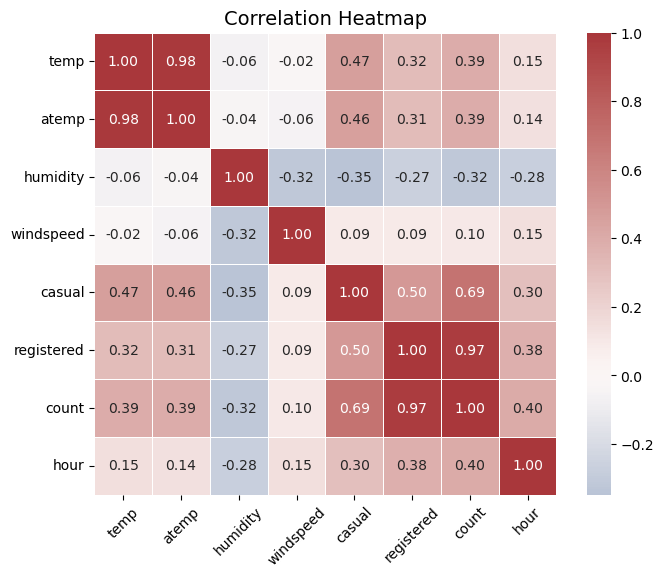

In [59]:
#Q2.11 coorelation heat map 
cols = ['temp', 'atemp', 'humidity', 'windspeed',
        'casual', 'registered', 'count', 'hour']

corr = df[cols].corr()

# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=0.5,
    square=True,
    cbar=True
)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [1]:
if {"weekday", "hour", "count"}.issubset(filtered.columns):
    st.subheader("🔥 Demand Heatmap: Hour vs Weekday")
    heat = (
        filtered.pivot_table(index="weekday", columns="hour", values="count", aggfunc="mean")
        .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    )
    fig_h = px.imshow(heat, aspect="auto")
    st.plotly_chart(fig_h, use_container_width=True)


NameError: name 'filtered' is not defined